# Maximum Likelihood Estimation

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.datasets import load_boston
data = load_boston()

"""
CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per $10,000
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
LSTAT % lower status of the population
MEDV Median value of owner-occupied homes in $1000’s
"""
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Dist: <scipy.stats._continuous_distns.beta_gen object at 0x7f4af61fd9d0>
Params: (1.8071656047381028, 8.043263883476014, 1.6168991843670952, 60.1966258117538)
Log-Likelihood: -1647.6337640928841
AIC: 3303.2675281857682

Dist: <scipy.stats._continuous_distns.cauchy_gen object at 0x7f4af5f33a60>
Params: (10.756005204011604, 4.216854013779663)
Log-Likelihood: -1789.7097379998227
AIC: 3583.4194759996453

Dist: <scipy.stats._continuous_distns.chi_gen object at 0x7f4af5f33d00>
Params: (0.5678876324887889, 1.7299999999999998, 7.004586527587851)
Log-Likelihood: -2221.32448441231
AIC: 4448.64896882462

Dist: <scipy.stats._continuous_distns.expon_gen object at 0x7f4af5f3ca30>
Params: (1.73, 10.923063241106721)
Log-Likelihood: -1715.7834824674865
AIC: 3435.566964934973

Dist: <scipy.stats._continuous_distns.gamma_gen object at 0x7f4af5f62fd0>
Params: (2.3094419599746745, 1.3918331706000586, 4.876165385668427)
Log-Likelihood: -1650.2023162177616
AIC: 3306.404632435523

Dist: <scipy.stats._continuo

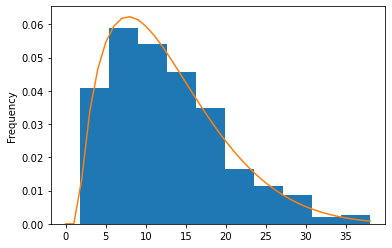

In [61]:
dists = [
    stats.beta,
    stats.cauchy,
    stats.chi,
    stats.expon,
    stats.gamma,
    stats.norm,
    stats.pareto,
    stats.t,
    stats.weibull_min,
    stats.weibull_max
]
data = df['LSTAT']

# MLE - find best distribution
results = []
for dist in dists:
    params = dist.fit(data.values)

    print(f'Dist: {dist}')
    print(f'Params: {params}')
    
    ll = np.sum(dist.logpdf(data.values, *params))  # Log-Likelihood
    k = len(params)
    aic = 2*k - 2*(ll)  # AIC
    
    print(f'Log-Likelihood: {ll}')
    print(f'AIC: {aic}\n')
    
    results.append((dist, params, ll, aic))

# Get best and plot
results = sorted(results, key=lambda x: x[3])
dist, params, best_ll, best_aic = results[0]

print(f'---')
print(f'Best Dist: {dist}')
print(f'Params: {params}')
print(f'Log-Likelihood: {best_ll}')
print(f'AIC: {best_aic}')

data_min = 0
data_max = int(max(data))+1

x = [i for i in range(data_min, data_max+1)]
y = [dist.pdf(val, *params) for val in x]

data.plot.hist(density=True)
plt.plot(x, y)

Beta Distribution makes sense for LSTAT, because Beta models probability of success or, in other words, the Beta Distribution can be understood as representing a probability distribution of probabilities. LSTAT is poverty rate, where "success" = above poverty and "Failure" = below poverty.

https://towardsdatascience.com/beta-distribution-intuition-examples-and-derivation-cf00f4db57af